## Import needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import scipy.cluster.hierarchy as shc

In [18]:
from sklearn.cluster import AgglomerativeClustering

## Read the files

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Normalize the data First

In [3]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


## Find Correlation between the columns

In [13]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation between the columns')

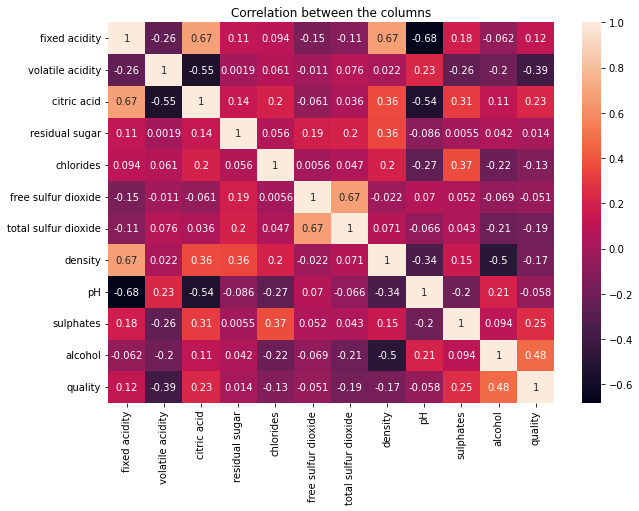

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between the columns')

## Create Dendograms for Average-Linked

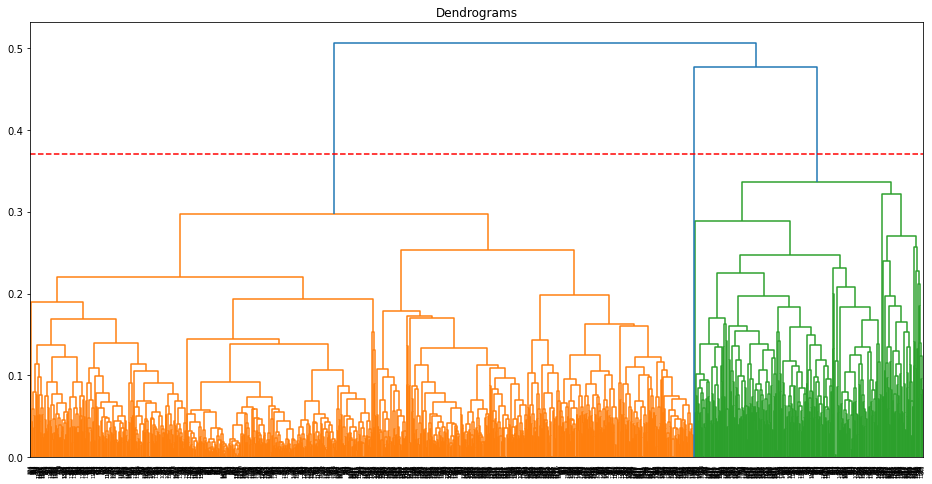

In [42]:
plt.figure(figsize=(16, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))
plt.axhline(y=0.37, color='r', linestyle='--')

In [40]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')  
cluster.fit_predict(data_scaled)
print(cluster.fit_predict(data_scaled))

[0 0 0 ... 0 0 0]


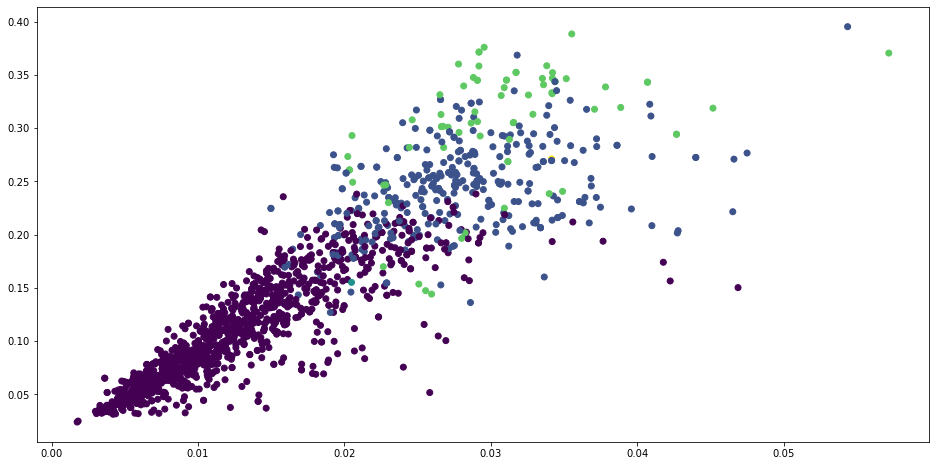

In [41]:
plt.figure(figsize=(16, 8))  
plt.scatter(data_scaled['sulphates'], data_scaled['quality'], c=cluster.labels_) 

## Create Dendograms for Complete-Linked 

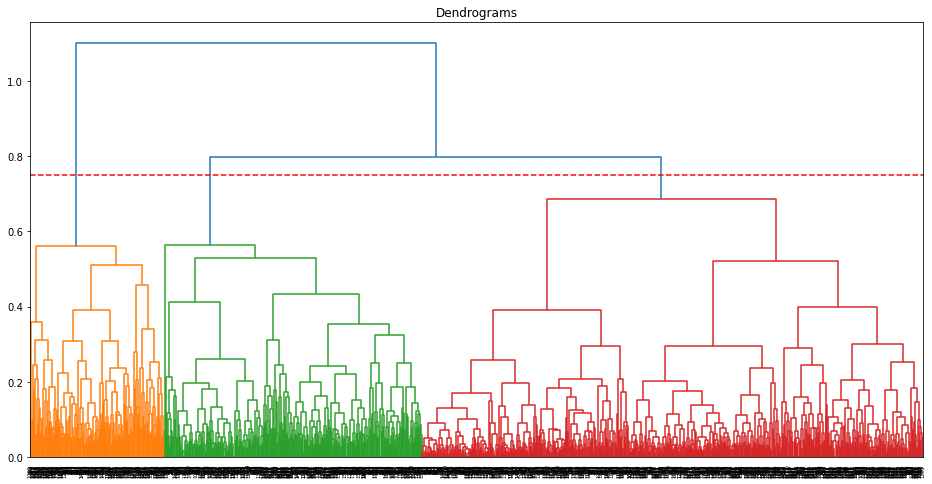

In [38]:
plt.figure(figsize=(16, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))
plt.axhline(y=0.75, color='r', linestyle='--')

In [19]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster.fit_predict(data_scaled)
print(cluster.fit_predict(data_scaled))

[1 2 3 ... 2 2 2]


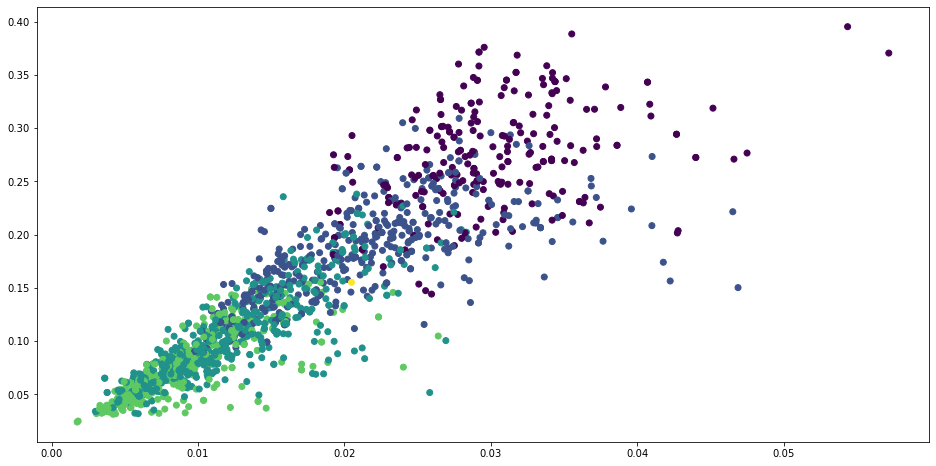

In [20]:
plt.figure(figsize=(16, 8))  
plt.scatter(data_scaled['sulphates'], data_scaled['quality'], c=cluster.labels_) 

## Create Dendograms for single-Linked

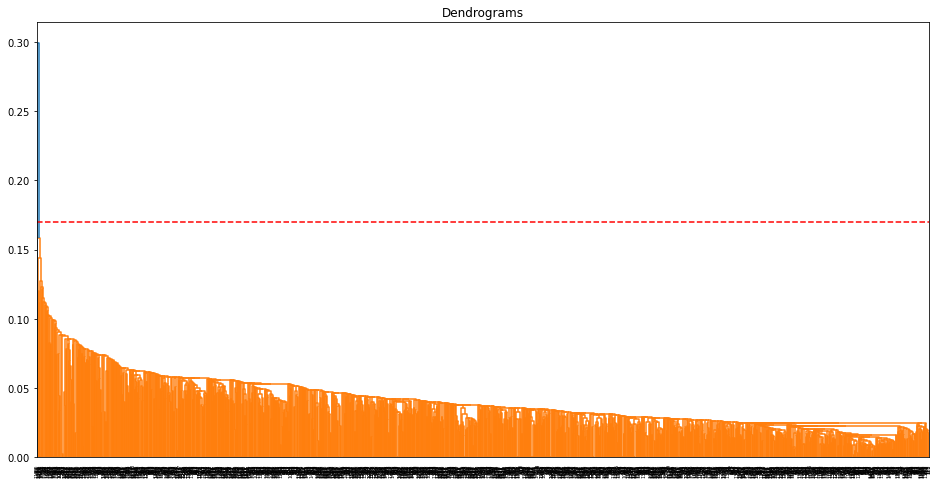

In [46]:
plt.figure(figsize=(16, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))
plt.axhline(y=0.17, color='r', linestyle='--')

In [53]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
cluster.fit_predict(data_scaled)
print(cluster.fit_predict(data_scaled))

[0 0 0 ... 0 0 0]


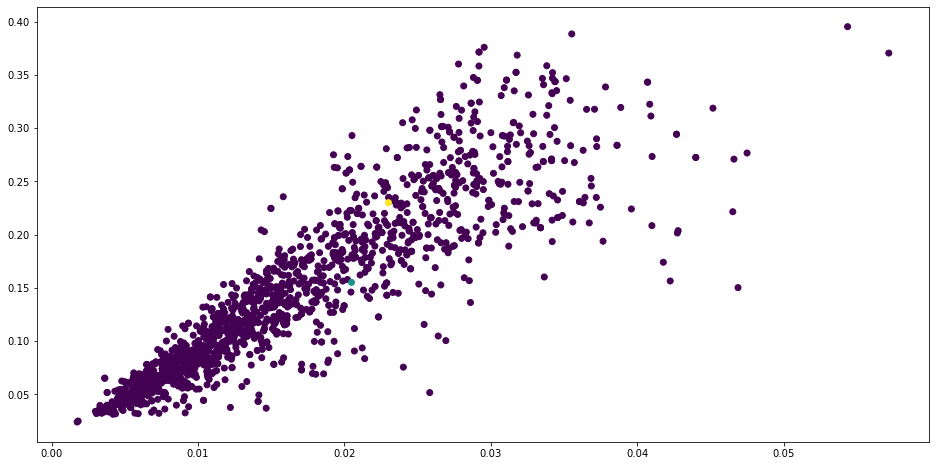

In [52]:
plt.figure(figsize=(16, 8))  
plt.scatter(data_scaled['sulphates'], data_scaled['quality'], c=cluster.labels_) 